In [1]:
import PyPDF2
import os
from os import listdir
from os.path import isfile, join
from io import StringIO
import pandas as pd
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
from spacy.matcher import PhraseMatcher
import slate3k as slate
import numpy as np
%matplotlib inline



In [2]:
#Function to read resumes from the folder one by one
mypath='/Users/anvitmangal/Desktop/sample_resumes' #enter your path here where you saved the resumes
onlyfiles = [os.path.join(mypath, f) for f in os.listdir(mypath) if f[0]!='.']

print(onlyfiles)
def pdfextract(file):
    with open(file, 'rb') as f:
        doc = slate.PDF(f)
    return doc

#function to read resume ends


#function that does phrase matching and builds a candidate profile
def create_profile(file):
    text = pdfextract(file) 
    text = str(text)
    text = text.replace("\\n", " ")
    text = text.lower()
    #below is the csv where we have all the keywords, you can customize your own
    keyword_dict = pd.read_csv('/Users/anvitmangal/Desktop/skill_db.csv')
    stats_words = [nlp(text.lower()) for text in keyword_dict['Statistics'].dropna(axis = 0)]
    NLP_words = [nlp(text.lower()) for text in keyword_dict['NLP'].dropna(axis = 0)]
    ML_words = [nlp(text.lower()) for text in keyword_dict['Machine Learning'].dropna(axis = 0)]
    DL_words = [nlp(text.lower()) for text in keyword_dict['Deep Learning'].dropna(axis = 0)]
    python_words = [nlp(text.lower()) for text in keyword_dict['Python'].dropna(axis = 0)]
    Data_Engineering_words = [nlp(text.lower()) for text in keyword_dict['Data Engineering'].dropna(axis = 0)]
    CV_words = [nlp(text.lower()) for text in keyword_dict['Computer Vision'].dropna(axis = 0)]

    matcher = PhraseMatcher(nlp.vocab)
    matcher.add('Stats', None, *stats_words)
    matcher.add('NLP', None, *NLP_words)
    matcher.add('ML', None, *ML_words)
    matcher.add('DL', None, *DL_words)
    matcher.add('Python', None, *python_words)
    matcher.add('DE', None, *Data_Engineering_words)
    matcher.add('CV', None, *CV_words)
    doc = nlp(text)
    
    d = []  
    matches = matcher(doc)
    for match_id, start, end in matches:
        rule_id = nlp.vocab.strings[match_id]  # get the unicode ID, i.e. 'COLOR'
        span = doc[start : end]  # get the matched slice of the doc
        d.append((rule_id, span.text))      
    keywords = "\n".join(f'{i[0]} {i[1]} ({j})' for i,j in Counter(d).items())
    
    ## convertimg string of keywords to dataframe
    df = pd.read_csv(StringIO(keywords),names = ['Keywords_List'])
    df1 = pd.DataFrame(df.Keywords_List.str.split(' ',1).tolist(),columns = ['Subject','Keyword'])
    df2 = pd.DataFrame(df1.Keyword.str.split('(',1).tolist(),columns = ['Keyword', 'Count'])
    df3 = pd.concat([df1['Subject'],df2['Keyword'], df2['Count']], axis =1) 
    df3['Count'] = df3['Count'].apply(lambda x: x.rstrip(")"))
    
    base = os.path.basename(file)
    filename = os.path.splitext(base)[0]
       
    name = filename.split('_')
    name2 = name[0]
    name2 = name2.lower()
    ## converting str to dataframe
    name3 = pd.read_csv(StringIO(name2),names = ['Candidate Name'])
    
    dataf = pd.concat([name3['Candidate Name'], df3['Subject'], df3['Keyword'], df3['Count']], axis = 1)
    dataf['Candidate Name'].fillna(dataf['Candidate Name'].iloc[0], inplace = True)

    return(dataf)
        
#function ends
        


['/Users/anvitmangal/Desktop/sample_resumes/Profile-8.pdf', '/Users/anvitmangal/Desktop/sample_resumes/Profile-9.pdf', '/Users/anvitmangal/Desktop/sample_resumes/AnvitMangal_CV.pdf', '/Users/anvitmangal/Desktop/sample_resumes/Profile-24.pdf', '/Users/anvitmangal/Desktop/sample_resumes/Profile-18.pdf', '/Users/anvitmangal/Desktop/sample_resumes/Profile-19.pdf', '/Users/anvitmangal/Desktop/sample_resumes/Profile-21.pdf', '/Users/anvitmangal/Desktop/sample_resumes/Profile-20.pdf', '/Users/anvitmangal/Desktop/sample_resumes/Profile-22.pdf', '/Users/anvitmangal/Desktop/sample_resumes/Profile-23.pdf', '/Users/anvitmangal/Desktop/sample_resumes/Profile-12.pdf', '/Users/anvitmangal/Desktop/sample_resumes/Profile-13.pdf', '/Users/anvitmangal/Desktop/sample_resumes/Profile-11.pdf', '/Users/anvitmangal/Desktop/sample_resumes/Profile-10.pdf', '/Users/anvitmangal/Desktop/sample_resumes/Profile-14.pdf', '/Users/anvitmangal/Desktop/sample_resumes/Profile-15.pdf', '/Users/anvitmangal/Desktop/sample_re

In [3]:
#code to execute/call the above functions

final_database=pd.DataFrame()
i = 0 
while i < len(onlyfiles):
    file = onlyfiles[i]
    dat = create_profile(file)
    final_database = final_database.append(dat)
    i +=1
    print(final_database)

  Candidate Name Subject                       Keyword Count
0      profile-8      ML             machine learning      2
1      profile-8     NLP               text-to-speech      1
2      profile-8     NLP           sentiment analysis      1
3      profile-8     NLP  natural language generation      3
4      profile-8      DE                     database      1
   Candidate Name Subject                       Keyword Count
0       profile-8      ML             machine learning      2
1       profile-8     NLP               text-to-speech      1
2       profile-8     NLP           sentiment analysis      1
3       profile-8     NLP  natural language generation      3
4       profile-8      DE                     database      1
0       profile-9      ML             machine learning      2
1       profile-9      DL                deep learning      2
2       profile-9  Python                       python      1
3       profile-9  Python                        numpy      1
4       profil

   Candidate Name Subject                         Keyword Count
0       profile-8      ML               machine learning      2
1       profile-8     NLP                 text-to-speech      1
2       profile-8     NLP             sentiment analysis      1
3       profile-8     NLP    natural language generation      3
4       profile-8      DE                       database      1
0       profile-9      ML               machine learning      2
1       profile-9      DL                  deep learning      2
2       profile-9  Python                         python      1
3       profile-9  Python                          numpy      1
4       profile-9  Python                          scipy      1
5       profile-9  Python                     matplotlib      1
6       profile-9      DL                     tensorflow      1
7       profile-9  Python                         pandas      1
8       profile-9      DE                            sql      2
9       profile-9      DE               

   Candidate Name Subject                         Keyword Count
0       profile-8      ML               machine learning      2
1       profile-8     NLP                 text-to-speech      1
2       profile-8     NLP             sentiment analysis      1
3       profile-8     NLP    natural language generation      3
4       profile-8      DE                       database      1
0       profile-9      ML               machine learning      2
1       profile-9      DL                  deep learning      2
2       profile-9  Python                         python      1
3       profile-9  Python                          numpy      1
4       profile-9  Python                          scipy      1
5       profile-9  Python                     matplotlib      1
6       profile-9      DL                     tensorflow      1
7       profile-9  Python                         pandas      1
8       profile-9      DE                            sql      2
9       profile-9      DE               

   Candidate Name Subject                         Keyword Count
0       profile-8      ML               machine learning      2
1       profile-8     NLP                 text-to-speech      1
2       profile-8     NLP             sentiment analysis      1
3       profile-8     NLP    natural language generation      3
4       profile-8      DE                       database      1
0       profile-9      ML               machine learning      2
1       profile-9      DL                  deep learning      2
2       profile-9  Python                         python      1
3       profile-9  Python                          numpy      1
4       profile-9  Python                          scipy      1
5       profile-9  Python                     matplotlib      1
6       profile-9      DL                     tensorflow      1
7       profile-9  Python                         pandas      1
8       profile-9      DE                            sql      2
9       profile-9      DE               

   Candidate Name Subject                         Keyword Count
0       profile-8      ML               machine learning      2
1       profile-8     NLP                 text-to-speech      1
2       profile-8     NLP             sentiment analysis      1
3       profile-8     NLP    natural language generation      3
4       profile-8      DE                       database      1
0       profile-9      ML               machine learning      2
1       profile-9      DL                  deep learning      2
2       profile-9  Python                         python      1
3       profile-9  Python                          numpy      1
4       profile-9  Python                          scipy      1
5       profile-9  Python                     matplotlib      1
6       profile-9      DL                     tensorflow      1
7       profile-9  Python                         pandas      1
8       profile-9      DE                            sql      2
9       profile-9      DE               

   Candidate Name Subject                         Keyword Count
0       profile-8      ML               machine learning      2
1       profile-8     NLP                 text-to-speech      1
2       profile-8     NLP             sentiment analysis      1
3       profile-8     NLP    natural language generation      3
4       profile-8      DE                       database      1
0       profile-9      ML               machine learning      2
1       profile-9      DL                  deep learning      2
2       profile-9  Python                         python      1
3       profile-9  Python                          numpy      1
4       profile-9  Python                          scipy      1
5       profile-9  Python                     matplotlib      1
6       profile-9      DL                     tensorflow      1
7       profile-9  Python                         pandas      1
8       profile-9      DE                            sql      2
9       profile-9      DE               

   Candidate Name Subject                         Keyword Count
0       profile-8      ML               machine learning      2
1       profile-8     NLP                 text-to-speech      1
2       profile-8     NLP             sentiment analysis      1
3       profile-8     NLP    natural language generation      3
4       profile-8      DE                       database      1
0       profile-9      ML               machine learning      2
1       profile-9      DL                  deep learning      2
2       profile-9  Python                         python      1
3       profile-9  Python                          numpy      1
4       profile-9  Python                          scipy      1
5       profile-9  Python                     matplotlib      1
6       profile-9      DL                     tensorflow      1
7       profile-9  Python                         pandas      1
8       profile-9      DE                            sql      2
9       profile-9      DE               

   Candidate Name Subject                         Keyword Count
0       profile-8      ML               machine learning      2
1       profile-8     NLP                 text-to-speech      1
2       profile-8     NLP             sentiment analysis      1
3       profile-8     NLP    natural language generation      3
4       profile-8      DE                       database      1
0       profile-9      ML               machine learning      2
1       profile-9      DL                  deep learning      2
2       profile-9  Python                         python      1
3       profile-9  Python                          numpy      1
4       profile-9  Python                          scipy      1
5       profile-9  Python                     matplotlib      1
6       profile-9      DL                     tensorflow      1
7       profile-9  Python                         pandas      1
8       profile-9      DE                            sql      2
9       profile-9      DE               

   Candidate Name Subject                         Keyword Count
0       profile-8      ML               machine learning      2
1       profile-8     NLP                 text-to-speech      1
2       profile-8     NLP             sentiment analysis      1
3       profile-8     NLP    natural language generation      3
4       profile-8      DE                       database      1
0       profile-9      ML               machine learning      2
1       profile-9      DL                  deep learning      2
2       profile-9  Python                         python      1
3       profile-9  Python                          numpy      1
4       profile-9  Python                          scipy      1
5       profile-9  Python                     matplotlib      1
6       profile-9      DL                     tensorflow      1
7       profile-9  Python                         pandas      1
8       profile-9      DE                            sql      2
9       profile-9      DE               

   Candidate Name Subject                         Keyword Count
0       profile-8      ML               machine learning      2
1       profile-8     NLP                 text-to-speech      1
2       profile-8     NLP             sentiment analysis      1
3       profile-8     NLP    natural language generation      3
4       profile-8      DE                       database      1
0       profile-9      ML               machine learning      2
1       profile-9      DL                  deep learning      2
2       profile-9  Python                         python      1
3       profile-9  Python                          numpy      1
4       profile-9  Python                          scipy      1
5       profile-9  Python                     matplotlib      1
6       profile-9      DL                     tensorflow      1
7       profile-9  Python                         pandas      1
8       profile-9      DE                            sql      2
9       profile-9      DE               

   Candidate Name Subject                         Keyword Count
0       profile-8      ML               machine learning      2
1       profile-8     NLP                 text-to-speech      1
2       profile-8     NLP             sentiment analysis      1
3       profile-8     NLP    natural language generation      3
4       profile-8      DE                       database      1
0       profile-9      ML               machine learning      2
1       profile-9      DL                  deep learning      2
2       profile-9  Python                         python      1
3       profile-9  Python                          numpy      1
4       profile-9  Python                          scipy      1
5       profile-9  Python                     matplotlib      1
6       profile-9      DL                     tensorflow      1
7       profile-9  Python                         pandas      1
8       profile-9      DE                            sql      2
9       profile-9      DE               

   Candidate Name Subject                         Keyword Count
0       profile-8      ML               machine learning      2
1       profile-8     NLP                 text-to-speech      1
2       profile-8     NLP             sentiment analysis      1
3       profile-8     NLP    natural language generation      3
4       profile-8      DE                       database      1
0       profile-9      ML               machine learning      2
1       profile-9      DL                  deep learning      2
2       profile-9  Python                         python      1
3       profile-9  Python                          numpy      1
4       profile-9  Python                          scipy      1
5       profile-9  Python                     matplotlib      1
6       profile-9      DL                     tensorflow      1
7       profile-9  Python                         pandas      1
8       profile-9      DE                            sql      2
9       profile-9      DE               

   Candidate Name Subject                         Keyword Count
0       profile-8      ML               machine learning      2
1       profile-8     NLP                 text-to-speech      1
2       profile-8     NLP             sentiment analysis      1
3       profile-8     NLP    natural language generation      3
4       profile-8      DE                       database      1
0       profile-9      ML               machine learning      2
1       profile-9      DL                  deep learning      2
2       profile-9  Python                         python      1
3       profile-9  Python                          numpy      1
4       profile-9  Python                          scipy      1
5       profile-9  Python                     matplotlib      1
6       profile-9      DL                     tensorflow      1
7       profile-9  Python                         pandas      1
8       profile-9      DE                            sql      2
9       profile-9      DE               

   Candidate Name Subject                         Keyword Count
0       profile-8      ML               machine learning      2
1       profile-8     NLP                 text-to-speech      1
2       profile-8     NLP             sentiment analysis      1
3       profile-8     NLP    natural language generation      3
4       profile-8      DE                       database      1
0       profile-9      ML               machine learning      2
1       profile-9      DL                  deep learning      2
2       profile-9  Python                         python      1
3       profile-9  Python                          numpy      1
4       profile-9  Python                          scipy      1
5       profile-9  Python                     matplotlib      1
6       profile-9      DL                     tensorflow      1
7       profile-9  Python                         pandas      1
8       profile-9      DE                            sql      2
9       profile-9      DE               

   Candidate Name Subject                         Keyword Count
0       profile-8      ML               machine learning      2
1       profile-8     NLP                 text-to-speech      1
2       profile-8     NLP             sentiment analysis      1
3       profile-8     NLP    natural language generation      3
4       profile-8      DE                       database      1
0       profile-9      ML               machine learning      2
1       profile-9      DL                  deep learning      2
2       profile-9  Python                         python      1
3       profile-9  Python                          numpy      1
4       profile-9  Python                          scipy      1
5       profile-9  Python                     matplotlib      1
6       profile-9      DL                     tensorflow      1
7       profile-9  Python                         pandas      1
8       profile-9      DE                            sql      2
9       profile-9      DE               

   Candidate Name Subject                         Keyword Count
0       profile-8      ML               machine learning      2
1       profile-8     NLP                 text-to-speech      1
2       profile-8     NLP             sentiment analysis      1
3       profile-8     NLP    natural language generation      3
4       profile-8      DE                       database      1
0       profile-9      ML               machine learning      2
1       profile-9      DL                  deep learning      2
2       profile-9  Python                         python      1
3       profile-9  Python                          numpy      1
4       profile-9  Python                          scipy      1
5       profile-9  Python                     matplotlib      1
6       profile-9      DL                     tensorflow      1
7       profile-9  Python                         pandas      1
8       profile-9      DE                            sql      2
9       profile-9      DE               

   Candidate Name Subject                         Keyword Count
0       profile-8      ML               machine learning      2
1       profile-8     NLP                 text-to-speech      1
2       profile-8     NLP             sentiment analysis      1
3       profile-8     NLP    natural language generation      3
4       profile-8      DE                       database      1
0       profile-9      ML               machine learning      2
1       profile-9      DL                  deep learning      2
2       profile-9  Python                         python      1
3       profile-9  Python                          numpy      1
4       profile-9  Python                          scipy      1
5       profile-9  Python                     matplotlib      1
6       profile-9      DL                     tensorflow      1
7       profile-9  Python                         pandas      1
8       profile-9      DE                            sql      2
9       profile-9      DE               

   Candidate Name Subject                         Keyword Count
0       profile-8      ML               machine learning      2
1       profile-8     NLP                 text-to-speech      1
2       profile-8     NLP             sentiment analysis      1
3       profile-8     NLP    natural language generation      3
4       profile-8      DE                       database      1
0       profile-9      ML               machine learning      2
1       profile-9      DL                  deep learning      2
2       profile-9  Python                         python      1
3       profile-9  Python                          numpy      1
4       profile-9  Python                          scipy      1
5       profile-9  Python                     matplotlib      1
6       profile-9      DL                     tensorflow      1
7       profile-9  Python                         pandas      1
8       profile-9      DE                            sql      2
9       profile-9      DE               

   Candidate Name Subject                         Keyword Count
0       profile-8      ML               machine learning      2
1       profile-8     NLP                 text-to-speech      1
2       profile-8     NLP             sentiment analysis      1
3       profile-8     NLP    natural language generation      3
4       profile-8      DE                       database      1
0       profile-9      ML               machine learning      2
1       profile-9      DL                  deep learning      2
2       profile-9  Python                         python      1
3       profile-9  Python                          numpy      1
4       profile-9  Python                          scipy      1
5       profile-9  Python                     matplotlib      1
6       profile-9      DL                     tensorflow      1
7       profile-9  Python                         pandas      1
8       profile-9      DE                            sql      2
9       profile-9      DE               

   Candidate Name Subject                          Keyword Count
0       profile-8      ML                machine learning      2
1       profile-8     NLP                  text-to-speech      1
2       profile-8     NLP              sentiment analysis      1
3       profile-8     NLP     natural language generation      3
4       profile-8      DE                        database      1
0       profile-9      ML                machine learning      2
1       profile-9      DL                   deep learning      2
2       profile-9  Python                          python      1
3       profile-9  Python                           numpy      1
4       profile-9  Python                           scipy      1
5       profile-9  Python                      matplotlib      1
6       profile-9      DL                      tensorflow      1
7       profile-9  Python                          pandas      1
8       profile-9      DE                             sql      2
9       profile-9      DE

   Candidate Name Subject                          Keyword Count
0       profile-8      ML                machine learning      2
1       profile-8     NLP                  text-to-speech      1
2       profile-8     NLP              sentiment analysis      1
3       profile-8     NLP     natural language generation      3
4       profile-8      DE                        database      1
0       profile-9      ML                machine learning      2
1       profile-9      DL                   deep learning      2
2       profile-9  Python                          python      1
3       profile-9  Python                           numpy      1
4       profile-9  Python                           scipy      1
5       profile-9  Python                      matplotlib      1
6       profile-9      DL                      tensorflow      1
7       profile-9  Python                          pandas      1
8       profile-9      DE                             sql      2
9       profile-9      DE

   Candidate Name Subject                          Keyword Count
0       profile-8      ML                machine learning      2
1       profile-8     NLP                  text-to-speech      1
2       profile-8     NLP              sentiment analysis      1
3       profile-8     NLP     natural language generation      3
4       profile-8      DE                        database      1
0       profile-9      ML                machine learning      2
1       profile-9      DL                   deep learning      2
2       profile-9  Python                          python      1
3       profile-9  Python                           numpy      1
4       profile-9  Python                           scipy      1
5       profile-9  Python                      matplotlib      1
6       profile-9      DL                      tensorflow      1
7       profile-9  Python                          pandas      1
8       profile-9      DE                             sql      2
9       profile-9      DE

In [4]:
#code to count words under each category and visulaize it through Matplotlib

final_database2 = final_database['Keyword'].groupby([final_database['Candidate Name'], final_database['Subject']]).count().unstack()
final_database2.reset_index(inplace = True)
final_database2.fillna(0,inplace=True)
new_data = final_database2.iloc[:,1:]
new_data.index = final_database2['Candidate Name']


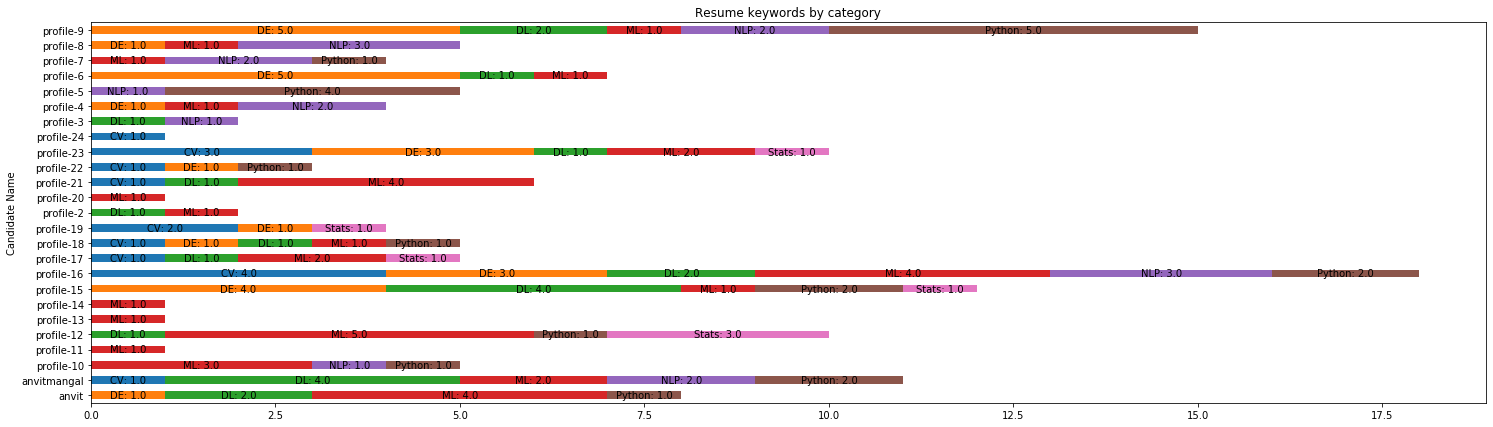

In [5]:
#execute the below line if you want to see the candidate profile in a csv format
#sample2=new_data.to_csv('sample.csv')
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10})
ax = new_data.plot.barh(title="Resume keywords by category", legend=False, figsize=(25,7), stacked=True)
labels = []
for j in new_data.columns:
    for i in new_data.index:
        label = str(j)+": " + str(new_data.loc[i][j])
        labels.append(label)
patches = ax.patches
for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., label, ha='center', va='center')
plt.savefig('img.jpg')
plt.show()

In [99]:
jd_list=[]
for i in range():
    

<Figure size 432x288 with 0 Axes>

In [98]:
new_data

Subject,CV,DE,DL,ML,NLP,Python,Stats
Candidate Name,,,,,,,
anvit,0.0,1.0,2.0,4.0,0.0,1.0,0.0
anvitmangal,1.0,0.0,4.0,2.0,2.0,2.0,0.0
profile-10,0.0,0.0,0.0,3.0,1.0,1.0,0.0
profile-11,0.0,0.0,0.0,1.0,0.0,0.0,0.0
profile-12,0.0,0.0,1.0,5.0,0.0,1.0,3.0
profile-13,0.0,0.0,0.0,1.0,0.0,0.0,0.0
profile-14,0.0,0.0,0.0,1.0,0.0,0.0,0.0
profile-15,0.0,4.0,4.0,1.0,0.0,2.0,1.0
profile-16,4.0,3.0,2.0,4.0,3.0,2.0,0.0


In [ ]:
# Data to plot
labels = 'Computer Vision', 'Data Engineering', 'Machine Learning', 'Deep Learning', 'Natural language Processing', 'Python', 'Statistical Analysis'
sizes=[]
explode = (0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01)  # explode 1st slice
colors = ['gold', 'yellowgreen', 'red','lightcoral', 'orange','lightskyblue', 'purple']
for i in range(len(new_data)):
    sizes=np.array(new_data.iloc[i])
    # Plot
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
    autopct='%1.1f%%', shadow=True, startangle=140)

    plt.axis('equal')
    plt.show()


In [ ]:
N=5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('Profile 1', 'Profile 2', 'Profile 3', 'Profile 4','Profile 5', 'Profile 6','Profile 7'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Computer Vision', 'Data Engineering', 'Machine Learning', 'Deep Learning', 'Natural language Processing', 'Python', 'Statistical Analysis'))

plt.show()

In [22]:
from time import sleep
import os
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains

login = "mac.anvit@gmail.com"
password = "Microeyes98"

#start browser session 
chromedriver = "/Users/anvitmangal/Documents/chromedriver" #change this to your selenium driver
os.environ["webdriver.chrome.driver"] = chromedriver
driver = webdriver.Chrome(chromedriver)

#open linkedin in automated browser
driver.get("https://www.linkedin.com/")
sleep(1)

#logs you into Linkedin
driver.find_element_by_name("session_key").send_keys(str(login))
password = driver.find_element_by_name("session_password").send_keys(str(password))
driver.find_element_by_class_name("sign-in-form__submit-btn").click()
print("successfully logged in")
sleep(0.5)

successfully logged in


In [3]:
skills=['Machine Learning','Artificial Intelligence','Natural Language Processing','Computer Vision','Deep Learning']
places=['Munich','Berlin','Amsterdam','New Delhi','Banglore','Hyderabad','Melbourne','Toronto','San Francisco','Vancouver','Seatle','Boston','Raleigh','Milan','Los Angeles','Chicago','Zurich','Paris','London','Tokyo']
chromedriver = "/Users/anvitmangal/Documents/chromedriver" #change this to your selenium driver
os.environ["webdriver.chrome.driver"] = chromedriver
driver = webdriver.Chrome(chromedriver)

all_urls=[]
for place in places:
    for skill in skills:
        #start browser session
        sleep(2)
        driver.get('https:www.google.com')
        sleep(2)
        s_query = 'site:linkedin.com/in/ AND "' + skill+ '" AND "'+ place + '"'

        search_query = driver.find_element_by_name('q')
        search_query.send_keys(s_query)
        sleep(1.5)

        search_query.send_keys(Keys.RETURN)
        sleep(1.5)

        linkedin_urls = driver.find_elements_by_class_name('iUh30')
        linkedin_urls = [url.text for url in linkedin_urls]
        sleep(1.5)

        next_pages=driver.find_elements_by_class_name('fl')[-9:]
        urls=[]
        for page in next_pages:
            urls.append(page.get_attribute("href"))
        for url in urls:
            driver.get(url)
            sleep(2)

            linkedin_urls_2 = driver.find_elements_by_class_name('iUh30')
            linkedin_urls_2 = [urlss.text for urlss in linkedin_urls_2]
            linkedin_urls.extend(linkedin_urls_2)
            sleep(2)
        all_urls.extend(linkedin_urls)

NoSuchWindowException: Message: no such window: window was already closed
  (Session info: chrome=75.0.3770.100)


In [27]:
i=0
for lurl in url1:
    #click the "more" button
    try:
        driver.get(lurl)
        sleep(3)
        driver.find_element_by_class_name("pv-s-profile-actions__overflow-toggle").click()
        time.sleep(2.5)

        #saves profile to pdf 
        driver.find_element_by_class_name("pv-s-profile-actions--save-to-pdf").click()
        time.sleep(2.5)
        print(lurl)
        print(i)
        i+=1
    
    except Exception:
        print("skipped")
        continue
    
driver.quit()

https://de.linkedin.com/in/he-zhang-101272b6
0
https://www.linkedin.com/in/jan-sölter-3a46a7ab
1
https://www.linkedin.com/in/niklas-donges/
2
https://www.linkedin.com/in/ananda-lahiri-917ba914b/
3
https://www.linkedin.com/in/carchambeau/
4
skipped
https://www.linkedin.com/in/claudia-pohlink/
5
skipped
https://www.linkedin.com/in/stefan-otte-29367a111/
6
https://www.linkedin.com/in/dat-tran-a1602320/
7
https://www.linkedin.com/in/flunkert/
8
skipped
https://www.linkedin.com/in/matteo-guzzo-56133191
9
https://www.linkedin.com/in/pedrolarroy
10
skipped
https://de.linkedin.com/in/marcel-ackermann
11
https://de.linkedin.com/in/ralf-herbrich-28a8324
12
skipped
https://www.linkedin.com/in/tijmenlv/
13
skipped
skipped
https://www.linkedin.com/in/urkosanchez/
14
skipped
https://de.linkedin.com/in/aitor-palacios-cuesta-1863959a/en
15
https://www.linkedin.com/in/mikiobraun/
16
https://de.linkedin.com/in/robert-meyer-7312304b
17
https://de.linkedin.com/in/dralexanderweiss/en
18
skipped
https://de.

skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped


skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped


In [24]:
import pickle
import time

In [18]:
url1=pickle.load( open( "/Users/anvitmangal/Downloads/urls1.pkl", "rb" ) )
url2=pickle.load( open( "/Users/anvitmangal/Downloads/urls2.pkl", "rb" ) )
url3=pickle.load( open( "/Users/anvitmangal/Downloads/urls3.pkl", "rb" ) )

In [19]:
url1.extend(url2)
url1.extend(url3)

In [20]:
len(url1)

2609

In [29]:
url1

['https://de.linkedin.com/in/he-zhang-101272b6',
 'https://www.linkedin.com/in/jan-sölter-3a46a7ab',
 'https://www.linkedin.com/in/niklas-donges/',
 'https://www.linkedin.com/in/ananda-lahiri-917ba914b/',
 'https://www.linkedin.com/in/carchambeau/',
 'https://www.linkedin.com/in/katharinejarmul/',
 'https://www.linkedin.com/in/claudia-pohlink/',
 'https://de.linkedin.com/in/vladimir-vv-vlasov',
 'https://www.linkedin.com/in/stefan-otte-29367a111/',
 'https://www.linkedin.com/in/dat-tran-a1602320/',
 'https://www.linkedin.com/in/flunkert/',
 'https://de.linkedin.com/in/michael-brückner-04a12115/en',
 'https://www.linkedin.com/in/matteo-guzzo-56133191',
 'https://www.linkedin.com/in/pedrolarroy',
 'https://www.linkedin.com/in/matthias-seeger-3010b765/',
 'https://de.linkedin.com/in/marcel-ackermann',
 'https://de.linkedin.com/in/ralf-herbrich-28a8324',
 'https://de.linkedin.com/in/rodolphe-jenatton-5201284',
 'https://www.linkedin.com/in/tijmenlv/',
 'https://www.linkedin.com/in/sebastia